In [1]:
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import scipy.linalg as la
import numpy as np
import statsmodels.api as sm
pd.options.display.max_rows = 99
from sklearn import linear_model


In [2]:
def plot_vectors(vectors,lab_name,savefig=False):

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

    ax1.plot(range(252), vectors[:,0])
    w = lowess(vectors[:,0],range(252), frac=1/3)
    ax1.plot(range(252),w[:,1])
    ax1.title.set_text('EV1')

    ax2.plot(range(252), vectors[:,1])
    w = lowess(vectors[:,1],range(252), frac=1/3)
    ax2.plot(range(252),w[:,1])
    ax2.title.set_text('EV2')

    ax3.plot(range(252), vectors[:,2])
    w = lowess(vectors[:,2],range(252), frac=1/3)
    ax3.plot(range(252),w[:,1])
    ax3.title.set_text('EV3')

    ax4.plot(range(252), vectors[:,3])
    w = lowess(vectors[:,3],range(252), frac=1/3)
    ax4.plot(range(252),w[:,1])
    ax4.title.set_text('EV4')

    fig.suptitle(f'{lab_name} eigen vectors',fontsize=18)
    plt.tight_layout()
    if savefig:
        plt.savefig(f'figures/vectors/{lab}_ eigenvectors.png')
    plt.show()

In [3]:
def plot_eigenvalues (values,lab, savefig=False):
    plt.plot(values)
    plt.title(f'{lab} eigenvalues')
    
    if savefig:
        plt.savefig(f'figures/values/{lab}_ eigenvalues.png')
   
    
    plt.show()

In [4]:
def plot_impute(labs,nulls,col):    

    imputed_index=nulls[col]
    imputrd_x=labs.index[imputed_index]
    imputed=labs[col][imputed_index]

    true_index=~nulls[col]
    true_x=labs.index[true_index]
    true=labs[col][true_index]

    plt.scatter(imputrd_x,imputed,color='red')
    plt.scatter(true_x,true,color='blue')
    plt.ylim([true.min(),true.max()])
    plt.legend(labels=['impute','true'])
    plt.show()


In [5]:
def preprocess_pat(pat, plot=False, plot_col='hb', do_lowess=True,add_noise=True):
    pat.reset_index(drop=True, inplace=True)
    labs=pat.iloc[:,2:]
    nulls=labs.isnull()
    lab_names=pat.columns[2:]
    
    if do_lowess:
        lowess = sm.nonparametric.lowess
        
        labs=pd.DataFrame(index=range(252))

        for lab in lab_names:
            rel=pat[['month',lab]]
            
            w = lowess( rel[lab],rel.month, frac=2/3)
            labs.loc[w[:,0],lab]=w[:,1]
    
    labs.interpolate(method='linear',axis=0, inplace=True,limit_direction='both')   

    
    
    if add_noise:
        stds=(pat[lab_names]-labs).std()

        noise_shape=labs.shape[0]
        for lab in lab_names:
            norma=np.random.normal(0, stds[lab], noise_shape)
            labs[lab]=labs[lab]+norma

    
    
    
    
    normed=(labs-labs.mean())/labs.std()
    if plot:
        plot_impute(normed, nulls, plot_col)
    
    final=pd.concat([pat.iloc[:,0:2], normed], axis=1)
    return final


In [6]:
pat=data.loc[data.id=='pat_1']
preprocess_pat(pat, plot=True,plot_col='hb', do_lowess=True, add_noise=False)

NameError: name 'data' is not defined

In [7]:
def row_pat(pat, lab):

    pat_id=pat.id.unique()[0]
    col_names=pat.month.astype(str)
    col_names.name='id'
    results = pd.DataFrame(columns=col_names)
    
    new=pat[lab]
    new.name=pat_id
    new.index=col_names
    results=results.append(new)
    return results

## PREPROCESS

In [7]:
case=pd.read_csv('case.csv')
control=pd.read_csv('control.csv')

data=pd.concat([case,control],ignore_index=True)
names=[f'pat_{id}' for id in range (200)]
num_months=252
data.id=list(np.repeat(names, num_months))


In [8]:
data.head()

,id,month,hb,rbc,wbc,leuk,lym,plt,crea,na,k,ca,gluc,tsh,t4,t3
0,pat_0,0,15.247289,4.03658,4.851638,3.311114,1.915999,227.005024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pat_0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pat_0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pat_0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pat_0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [344]:
recalc=False
if recalc:
    proc=data.groupby(['id']).apply(preprocess_pat)
    proc.reset_index(level=0, drop=True, inplace=True)
    proc.to_csv('cache/proc.csv')
    
    # proc.set_index('id', inplace=True)
else:
    proc=pd.read_csv('cache/proc.csv').iloc[:,1:]

## EIGEN

In [461]:
create_flats=True

if create_flats:
    for lab in lab_names:
        lab_flat=proc.groupby(['id']).apply(lambda x: row_pat(x, lab))
        lab_flat.reset_index(level=0, drop=True, inplace=True)
        lab_flat.columns.name='months'
        lab_flat.to_csv(f'cache/proc_flat/{lab}_flat.csv')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


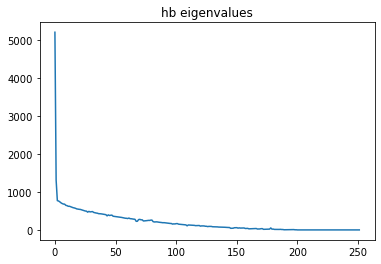

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


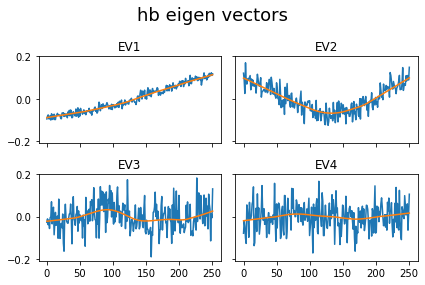

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


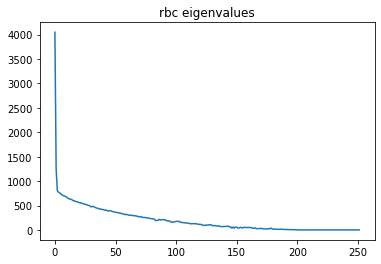

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


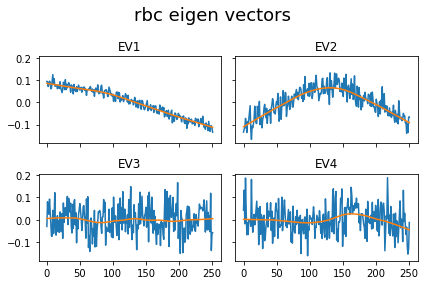

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


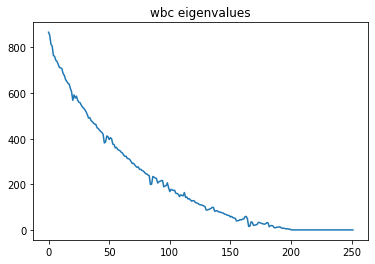

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


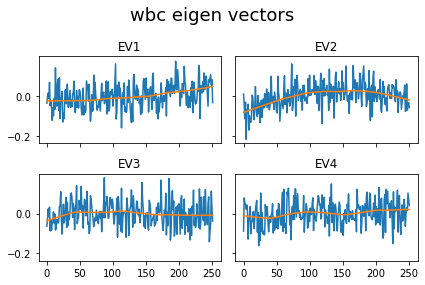

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


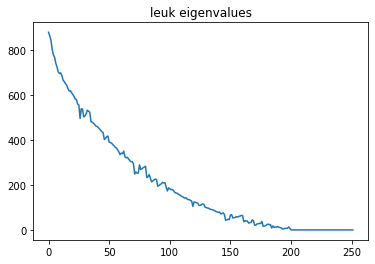

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


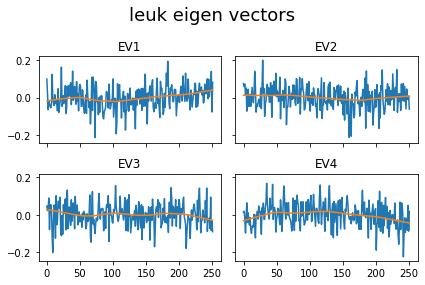

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


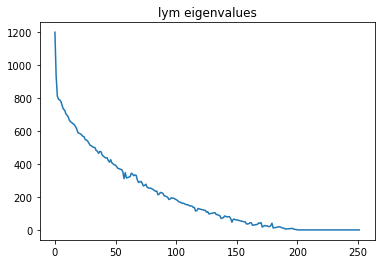

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


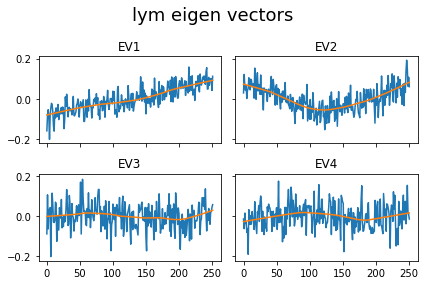

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


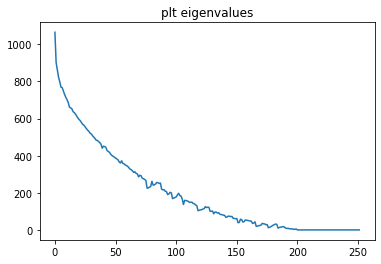

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


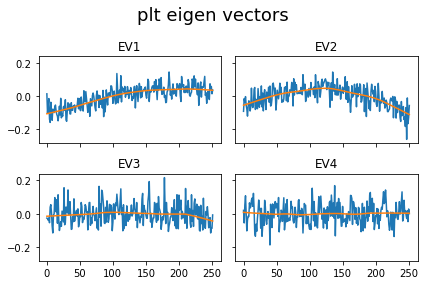

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


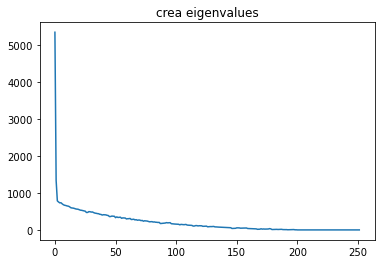

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


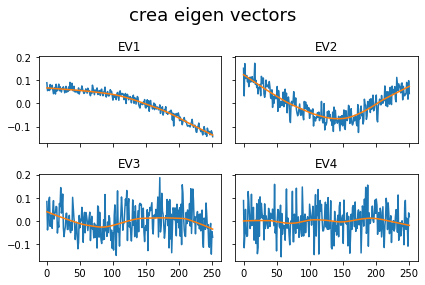

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


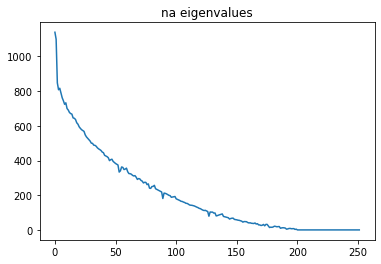

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


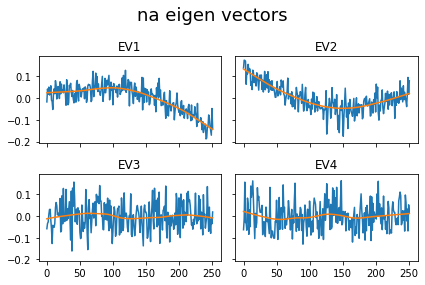

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


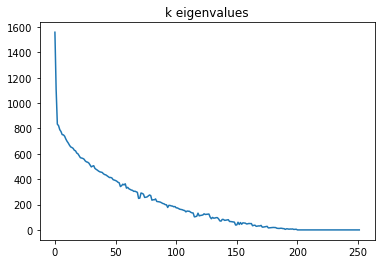

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


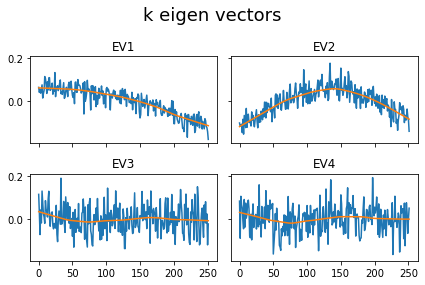

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


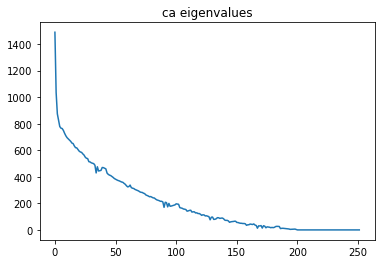

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


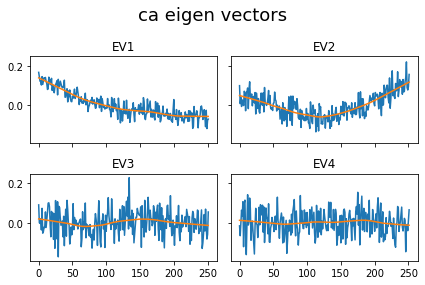

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


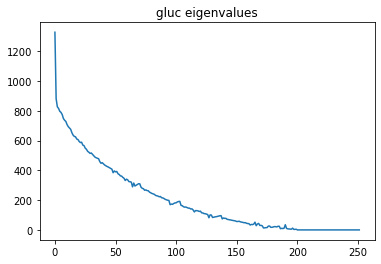

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


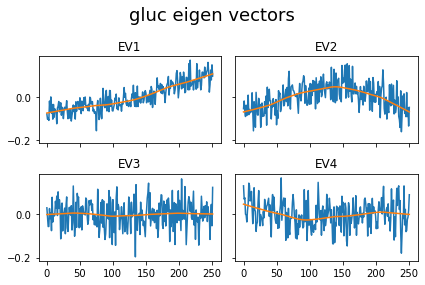

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


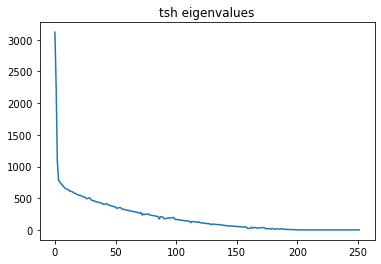

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


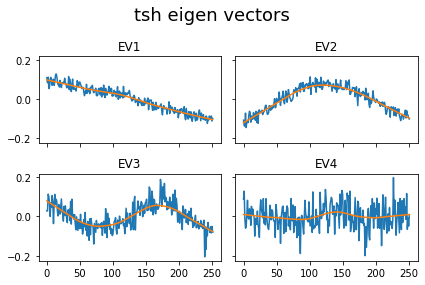

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


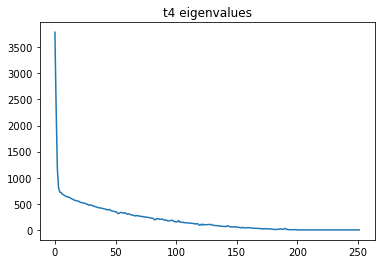

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


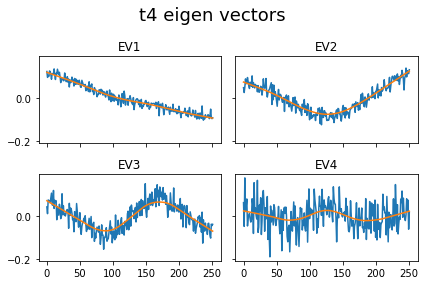

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


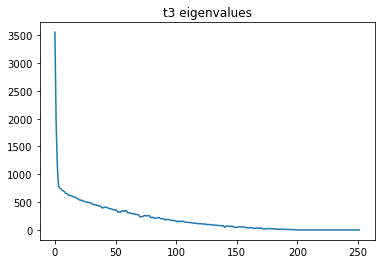

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


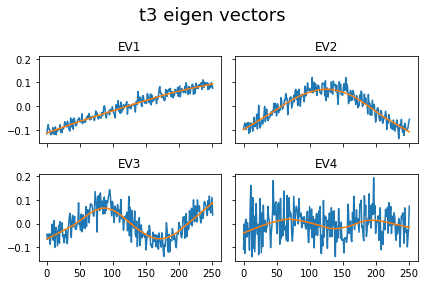

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [581]:
lm = linear_model.LinearRegression()
final_df=pd.DataFrame({'id':data.id.unique()})

for lab in lab_names:

    lab_flat=pd.read_csv(f'cache/proc_flat/{lab}_flat.csv')
    lab_flat.rename(columns={lab_flat.columns[0]: "id" }, inplace=True)
    lab_flat.set_index('id', drop=True, inplace=True)

    multi=np.matmul(lab_flat.T.to_numpy(), lab_flat.to_numpy())
    values, vectors = la.eig(multi)
    plot_eigenvalues(values,lab,savefig=True)
    plot_vectors(vectors,lab, savefig=True)

    vectors_df=pd.DataFrame(index=range(252))
    vectors_df['PV1']=lowess(vectors[:,0],range(252), frac=1/3)[:,1]
    vectors_df['PV2']=lowess(vectors[:,1],range(252), frac=1/3)[:,1]
    vectors_df['PV3']=lowess(vectors[:,2],range(252), frac=1/3)[:,1]

    results={}

    for pat in data.id.unique():
        pat_df=data.loc[data.id==pat]
        pat_df.reset_index(drop=True, inplace=True)

        missing=pat_df[lab].isna()
        X=vectors_df[~missing]
        y=pat_df[lab][~missing]
        model = lm.fit(X,y)
        results[pat]=[lm.intercept_]+list(lm.coef_)

    coef_df=pd.DataFrame.from_dict(results,orient='index')
    coef_df.columns=[f'{lab}_' + s for s in ['intercept','pv1','pv2','pv3']]
    final_df=final_df.merge(coef_df, left_on='id', right_on=coef_df.index)

In [582]:
final_df

,id,hb_intercept,hb_pv1,hb_pv2,hb_pv3,rbc_intercept,rbc_pv1,rbc_pv2,rbc_pv3,wbc_intercept,...,tsh_pv2,tsh_pv3,t4_intercept,t4_pv1,t4_pv2,t4_pv3,t3_intercept,t3_pv1,t3_pv2,t3_pv3
0,pat_0,14.698430,1.139286,1.309014,-7.957363,4.518848,0.196359,-0.087588,5.151041,6.482417,...,-0.326381,1.063424,1.247265,0.539123,-0.850415,-0.391220,0.395622,-0.279614,-0.163547,-0.071998
1,pat_1,15.795509,-0.737129,-1.755770,-2.052700,5.116883,-0.462522,0.423243,15.705761,10.062555,...,0.080077,3.792137,0.758984,-1.104598,1.556472,-0.701185,0.484928,0.112507,-0.433807,0.451209
2,pat_2,13.988247,-1.091658,0.404781,6.179743,4.956089,0.455001,2.906296,5.346971,9.841752,...,-1.529052,-1.137856,0.991021,-0.013506,0.761601,0.056309,0.382804,0.241365,-0.117113,-0.657305
3,pat_3,14.392280,0.042209,-1.440188,-4.405212,5.333202,0.569710,-0.601650,-11.450509,9.026367,...,3.225658,-8.209145,1.372187,-0.024580,-0.397112,0.152746,0.346769,0.108696,0.415181,-0.495895
4,pat_4,15.128804,-0.116474,0.286592,-3.838422,6.209562,-0.367423,-2.358834,-9.151967,9.497931,...,-3.087657,-7.534766,0.742481,0.336123,1.633211,0.083765,0.317448,-0.482918,0.384039,0.690178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,pat_195,14.696494,-1.423589,1.081104,3.914121,4.523730,-1.175563,-0.062639,4.467754,10.502748,...,-6.042422,3.532811,0.900796,0.164420,1.234192,0.738812,0.381549,0.017581,-0.491251,-0.141578
196,pat_196,13.472898,-11.516880,0.348317,3.258694,5.839814,3.466566,0.393964,2.427669,8.033125,...,-4.715361,-6.097346,0.927398,-0.064420,-1.043079,-1.650498,0.218301,0.009177,0.224223,0.409270
197,pat_197,13.215331,1.946145,-2.101141,-1.350080,5.012020,-1.502569,0.410895,23.001654,4.652185,...,-3.684355,-7.110905,0.824944,0.417689,0.639582,-1.954121,0.369790,-0.103853,-0.237629,-0.294975
198,pat_198,14.268812,-0.245188,-2.902349,-4.935730,4.890368,0.680150,-2.098592,-13.112610,8.848981,...,1.545468,5.775780,1.343530,-1.416053,-0.461502,0.762148,0.511965,-0.260250,0.029296,0.160368


## PLOTTINH


In [258]:
pat=data.loc[data.id=='pat_0']
preprocess_pat(pat, plot=False,plot_col='hb', do_lowess=True, add_noise=True)

,id,month,hb,rbc,wbc,leuk,lym,plt,crea,na,k,ca,gluc,tsh,t4,t3
0,pat_0,0,1.299911,2.709510,-1.785386,-2.127432,1.510643,-2.093685,-1.308152,-1.704579,0.099193,1.062603,-1.313975,0.165681,0.206005,2.351957
1,pat_0,1,1.257004,2.656420,-1.775628,-2.109525,1.465690,-2.075480,-1.308152,-1.704579,0.099193,1.062603,-1.313975,0.165681,0.206005,2.351957
2,pat_0,2,1.214097,2.603331,-1.765871,-2.091617,1.420737,-2.057275,-1.308152,-1.704579,0.099193,1.062603,-1.313975,0.165681,0.206005,2.351957
3,pat_0,3,1.171190,2.550241,-1.756114,-2.073710,1.375785,-2.039070,-1.308152,-1.704579,0.099193,1.062603,-1.313975,0.165681,0.206005,2.351957
4,pat_0,4,1.128282,2.497152,-1.746357,-2.055802,1.330832,-2.020865,-1.308152,-1.704579,0.099193,1.062603,-1.313975,0.165681,0.206005,2.351957
5,pat_0,5,1.085375,2.444063,-1.736600,-2.037895,1.285879,-2.002661,-1.308152,-1.704579,0.099193,1.062603,-1.313975,0.165681,0.206005,2.351957
6,pat_0,6,1.043024,2.392552,-1.726741,-2.019733,1.241306,-1.984828,-1.308152,-1.704579,0.099193,1.062603,-1.313975,0.165681,0.206005,2.351957
7,pat_0,7,1.000673,2.341041,-1.716883,-2.001572,1.196733,-1.966995,-1.308152,-1.704579,0.099193,1.062603,-1.313975,0.165681,0.206005,2.351957
8,pat_0,8,0.958323,2.289531,-1.707024,-1.983411,1.152160,-1.949162,-1.308152,-1.704579,0.099193,1.062603,-1.313975,0.165681,0.206005,2.351957
9,pat_0,9,0.915972,2.238020,-1.697166,-1.965249,1.107588,-1.931329,-1.308152,-1.704579,0.099193,1.062603,-1.313975,0.165681,0.206005,2.351957


# SOME PLOTTING

In [154]:
pat=data.loc[proc.id=='pat_0']
pat_proc=proc.loc[proc.id=='pat_0']

ValueError: cannot reindex from a duplicate axis

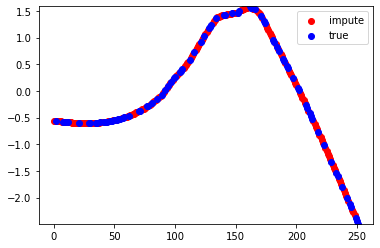

,id,month,hb,rbc,wbc,leuk,lym,plt,crea,na,k,ca,gluc,tsh,t4,t3
0,pat_55,0,-0.556741,-2.217504,1.666026,1.326780,1.733954,2.695015,0.438618,0.266377,-1.663682,-0.518169,-2.232338,-0.089034,-0.064546,1.379360
1,pat_55,1,-0.556741,-2.217504,1.666026,1.326780,1.733954,2.695015,0.452172,0.269916,-1.648015,-0.499517,-2.190975,-0.089034,-0.064546,1.379360
2,pat_55,2,-0.556741,-2.217504,1.666026,1.326780,1.733954,2.695015,0.465725,0.273455,-1.632348,-0.480864,-2.149613,-0.089034,-0.064546,1.379360
3,pat_55,3,-0.560119,-2.182962,1.646047,1.310015,1.715247,2.643152,0.479279,0.276995,-1.616681,-0.462212,-2.108250,-0.089034,-0.064546,1.379360
4,pat_55,4,-0.563497,-2.148420,1.626068,1.293249,1.696541,2.591288,0.492621,0.279605,-1.601303,-0.443534,-2.066985,-0.089034,-0.064546,1.379360
5,pat_55,5,-0.566875,-2.113878,1.606089,1.276484,1.677835,2.539425,0.505964,0.282216,-1.585926,-0.424855,-2.025720,-0.089034,-0.064546,1.379360
6,pat_55,6,-0.570253,-2.079335,1.586109,1.259718,1.659128,2.487561,0.519307,0.284827,-1.570548,-0.406177,-1.984455,-0.089034,-0.064546,1.379360
7,pat_55,7,-0.573631,-2.044793,1.566130,1.242953,1.640422,2.435697,0.532650,0.287438,-1.555170,-0.387498,-1.943190,-0.089034,-0.064546,1.379360
8,pat_55,8,-0.577009,-2.010251,1.546151,1.226188,1.621716,2.383834,0.545636,0.288254,-1.540642,-0.369313,-1.901884,-0.089034,-0.064546,1.379360
9,pat_55,9,-0.579872,-1.975799,1.526610,1.209978,1.603424,2.333711,0.558622,0.289071,-1.526113,-0.351127,-1.860578,-0.089034,-0.064546,1.379360


In [340]:
pat=data.loc[data.id=='pat_55']
preprocess_pat(pat, plot=True,plot_col='hb', do_lowess=True, add_noise=False)

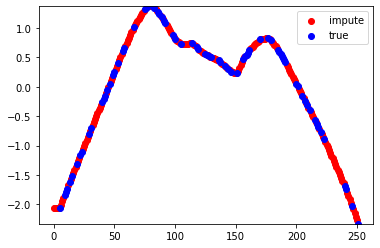

,id,month,hb,rbc,wbc,leuk,lym,plt,crea,na,k,ca,gluc,tsh,t4,t3
0,pat_1,0,-2.062489,2.218552,2.344792,2.527445,1.296037,0.628538,-1.232011,0.412095,-2.323737,-1.463092,-1.751578,0.287841,-0.644567,0.650730
1,pat_1,1,-2.062489,2.218552,2.344792,2.527445,1.296037,0.628538,-1.230470,0.410461,-2.274895,-1.456455,-1.736959,0.287841,-0.644567,0.650730
2,pat_1,2,-2.062489,2.218552,2.344792,2.527445,1.296037,0.628538,-1.228702,0.408279,-2.227486,-1.449400,-1.722295,0.287841,-0.644567,0.650730
3,pat_1,3,-2.062489,2.218552,2.344792,2.527445,1.296037,0.628538,-1.226933,0.406098,-2.180076,-1.442345,-1.707630,0.242829,-0.643248,0.638898
4,pat_1,4,-2.062489,2.218552,2.344792,2.527445,1.296037,0.628538,-1.225164,0.403916,-2.132667,-1.435290,-1.692965,0.197818,-0.641929,0.627065
5,pat_1,5,-2.062489,2.218552,2.344792,2.527445,1.296037,0.628538,-1.223395,0.401734,-2.085257,-1.428236,-1.678301,0.152806,-0.640610,0.615232
6,pat_1,6,-2.006721,2.178140,2.311441,2.488639,1.255131,0.648882,-1.221626,0.399552,-2.037848,-1.421181,-1.663636,0.107795,-0.639290,0.603399
7,pat_1,7,-1.950953,2.137728,2.278091,2.449833,1.214226,0.669226,-1.219857,0.397371,-1.990438,-1.414126,-1.648971,0.065390,-0.637916,0.591863
8,pat_1,8,-1.895184,2.097316,2.244740,2.411027,1.173321,0.689569,-1.217702,0.394288,-1.945160,-1.406664,-1.634147,0.022985,-0.636541,0.580326
9,pat_1,9,-1.839416,2.056904,2.211390,2.372221,1.132416,0.709913,-1.215546,0.391205,-1.899882,-1.399202,-1.619323,-0.019420,-0.635166,0.568790


In [330]:
pat=data.loc[data.id=='pat_1']
preprocess_pat(pat, plot=True,plot_col='hb', do_lowess=True, add_noise=False)

In [267]:
pat.shape

(252, 16)

In [268]:
pat

,id,month,hb,rbc,wbc,leuk,lym,plt,crea,na,k,ca,gluc,tsh,t4,t3
252,pat_1,0,NaN,NaN,NaN,NaN,NaN,NaN,1.281623,146.554743,3.575657,1.228833,96.946394,NaN,NaN,NaN
253,pat_1,1,NaN,NaN,NaN,NaN,NaN,NaN,1.049312,142.629537,3.475659,1.193822,75.064659,NaN,NaN,NaN
254,pat_1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.114490,0.718960,0.464051
255,pat_1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,pat_1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,pat_1,5,15.529510,4.719490,8.077996,5.669057,3.620384,264.114065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,pat_1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.418651,0.879650,0.422547
259,pat_1,7,NaN,NaN,NaN,NaN,NaN,NaN,1.342245,141.222095,3.466220,1.258467,74.414027,NaN,NaN,NaN
260,pat_1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,pat_1,9,16.186398,5.008885,6.324670,4.715455,2.790357,336.773099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
